In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# YOUR CODE HERE (OPTION) 
# If you need other libraries, you can import them here
import seaborn as sns

- Read data from `precessed_data.csv`

In [2]:
courses_df = pd.read_csv('../Data/processed_data.csv', sep=',',engine='python', encoding='utf-8')
courses_df

,name,enrollment,language,rating,level,duration,instructor,offered by,instructor_rate
0,The Science of Success: What Researchers Know ...,173770,English,4.8,Beginner,11,Paula Caproni,University of Michigan,4.8
1,Microsoft Azure Databricks for Data Engineering,12942,English,4.4,Intermediate,21,Microsoft,Microsoft,4.2
2,Finance for Everyone: Debt,15586,English,4.8,Other,11,Arshad Ahmad,McMaster University,4.7
3,Basics of Statutory Compliance and Taxation,3123,English,4.8,Intermediate,46,Tally Education Pvt. Ltd,Tally Education,4.7
4,Preventing Chronic Pain: A Human Systems Approach,33519,English,4.7,Beginner,44,"Dr. James Fricton, DDS, MS",University of Minnesota,4.8
...,...,...,...,...,...,...,...,...,...
1757,Introduction to Participatory Approaches in Pu...,1651,English,4.4,Beginner,18,Helen Ward,Imperial College London,4.7
1758,Introducing Security: Aligning Asset and Risk ...,7815,English,4.6,Beginner,7,(ISC)Â² Education & Training,ISC2,4.7
1759,Academic Information Seeking,28386,English,4.7,Other,6,"Thomas Skov Jensen , Birgitte Munk, University...",Technical University of Denmark (DTU),4.7
1760,A Blueprint for Success â Your Video Pre-Pro...,5438,English,4.5,Beginner,11,"Emilie Johnson, Paul Daugherty",University of Colorado Boulder,4.7


# **MAKING QUESTIONS**

## **Question 4:**
People have a saying: “It's the first step that counts.” Learners have the mentality of choosing a suitable course using many different criteria. One of them is to consider the quality of a school through the course `ratings` the school offers and the number of people enrolled in `enrollment`. **So are the above criteria suitable? In other words, schools with good ratings have more students enrolling, right?**
- **_Answering this question will help_** learners have a basis to believe whether their course selection criteria are appropriate, from which they can adjust their course selection criteria accordingly.
- **_How we answer this question:_** We will evaluate based on the distribution between the average of all course `ratings` the school offers and the total number of students' school `enrollment`.

### **_Step 01:_** Preprocessing

In [3]:
# Reputation of each University
rating_df = courses_df[['offered by', 'rating']].groupby(by='offered by').mean().sort_values(by='rating', ascending=False)

# Compute sum enrollment of each University
enrollment_df = courses_df[['offered by', 'enrollment']].groupby(by='offered by').sum().sort_values(by='enrollment', ascending=False)

# Merge df
uni_df = pd.concat([rating_df, enrollment_df], axis=1)

In [4]:
# TEST
assert len(uni_df.index) != 0
assert uni_df.isnull().values.any() == False
print('No NaN value.' if uni_df.isnull().values.any() == False else 'Exists NaN value.')

No NaN value.


### **_Step 02:_** Analyze

In [5]:
# Devide values into bins
bin_ = 0.5
start_ = 1.0
end_ = 5.0
intervals = np.arange(start_, end_+(bin_/2), bin_)
uni_df['rating_bin'] = pd.cut(uni_df['rating'], intervals)
uni_plot = uni_df.reset_index().drop(columns=['rating', 'offered by']).groupby(by='rating_bin').sum()
uni_plot.index = uni_plot.index.astype(str)
uni_plot

,enrollment
rating_bin,
"(1.0, 1.5]",0
"(1.5, 2.0]",0
"(2.0, 2.5]",0
"(2.5, 3.0]",0
"(3.0, 3.5]",0
"(3.5, 4.0]",14661
"(4.0, 4.5]",4650904
"(4.5, 5.0]",76644611


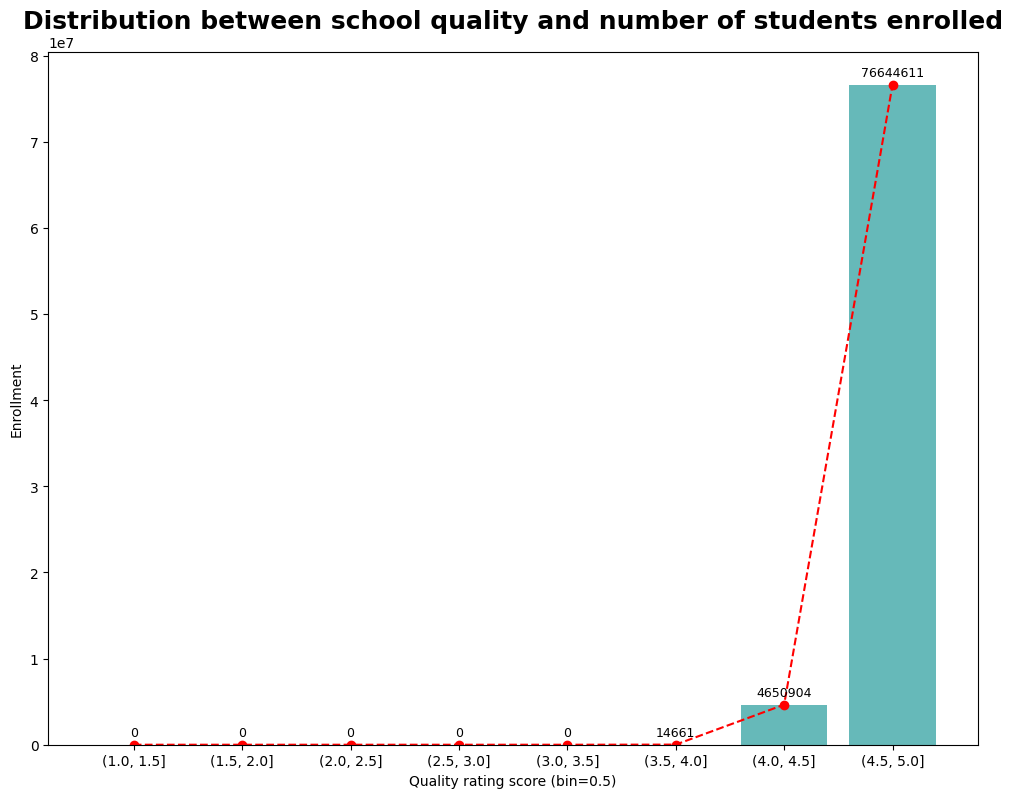

In [6]:
# Plot line chart
plt.figure(figsize=(12, 9))
plt.bar(uni_plot.index.values, uni_plot['enrollment'], color='darkcyan', alpha=0.6)
plt.scatter(uni_plot.index.values, uni_plot['enrollment'], color='red')
plt.plot(uni_plot.index.values, uni_plot['enrollment'], linestyle="--", color='red')

plt.title("Distribution between school quality and number of students enrolled", fontsize=18, fontweight='bold')

plt.xlabel("Quality rating score (bin={bin})".format(bin=bin_))
plt.xticks(uni_plot.index.values, rotation=0)
plt.ylabel("Enrollment")

for i in range(len(uni_plot.index.values)):
    plt.text(uni_plot.index.values[i], uni_plot['enrollment'].iloc[i]+1000000, uni_plot['enrollment'].iloc[i], ha="center", fontsize=9)

#plt.grid()
plt.show()

**_Đánh giá chung:_**
- Trường học có trung bình các đánh giá khóa học càng cao thì tỷ lệ học viên sẽ lựa chọn khóa học được cung cấp bởi trường học đó càng lớn.
- Điều đó được thể hiện rõ ở trong biểu đồ trên, ta thấy rằng người học sẽ có xu hướng lựa chọn các khóa học được cung cấp bởi các trường có nền tảng đánh giá ở mức tốt.
- Lý do lựa chọn `bin_ = 0.5`: Tùy vào mục đích trực quan dữ liệu, ta có một số trường hợp:
    + Khi lựa chọn giá trị quá nhỏ, dẫn đến việc có những `bin` sẽ không có giá trị, hoặc làm biểu đồ bị biến thiên mạnh, không còn giữ được mục đích trực quan.
    + Khi lựa chọn giá trị quá lớn, việc trực quan trở nên không rõ ràng, dẫn đến không đáng tin cậy.
    + Việc lựa chọn `bin` có giá trị như trên giúp cho biểu đồ không gặp sự biến thiên mạnh, vừa trực quan được dữ liệu theo đúng mục đích ban đầu, không làm cho người xem bị hoang mang khi `bin` bị chia quá mảnh.

[ENGLISH]:
**_General assessment:_**
- Schools with higher average course ratings tend to attract more students for their offered courses.
- The chart above clearly depicts that learners choose courses from schools with a good assessment platform.
- The reason for choosing `bin_ = 0.5` is to ensure that the data visualization serves its purpose effectively.
     + If the value of `bin` is too small, some bins may have no value or the chart may fluctuate strongly, losing its visual purpose.
     + If the value of `bin` is too large, the visualization becomes unclear, leading to unreliability.
     + Choosing `bin` with the aforementioned value helps the chart avoid strong fluctuations while visualizing the data according to its original purpose, without causing any confusion to the viewer due to thin bin divisions.

## **Question 5:**
Coursera course registrants can be from any country in the world. **So does the existence of a language barrier affect course selection?**
- **_Answering this question will help_** learners determine the common languages in which they and the school providing the course communicate, from which learners will proactively equip the necessary language for learning on Coursera in the future.
- **_How we answer this question:_** We answer this question by looking at the total number of `enrollments` in each `language` on the Coursera system.

### **_Step 01:_** Preprocessing

## **Question 6:**
Some people are unaware of what Coursera offers beyond the fact that it provides courses from reputable universities across the globe. As a result, **they may be curious about the various fields that Coursera's courses cover and whether they can find relevant courses related to their industry on the platform, cannot they?**
- **_Answering this question will help_** to provide users with general information about the fields available on Coursera. It seeks to answer which field has the most courses, which field has the largest number of registered learners, and which field requires the most study time.
- **_How we answer this question:_** We answer this question by grouping by `field` the total number of courses `name` available on Coursera, the total number of `enrollment` to study on Coursera, average `duration` on Coursera.

### **_Step 01:_** Preprocessing